# 21M.387 Fundamentals of Music Processing
## Lab2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *

%matplotlib inline
#%matplotlib notebook
plt.rcParams['figure.figsize'] = (12, 4)

x = np.sin(2 * np.pi  * 440 * np.linspace(0, 2, 2 * 44100))
ipd.Audio(x, rate=44100)

## Exercise 1

Array slicing lets you pick subparts of a vector. Here are some examples below

In [2]:
a = np.arange(5) * 10
print 'a =', a
print 'a[3] =', a[3]
print 'a[3:5] =', a[3:5]
print 'a[:3] =', a[:3]
print 'a[3:] =', a[3:]
print 'a[:-1] =', a[:-1]


a = [ 0 10 20 30 40]
a[3] = 30
a[3:5] = [30 40]
a[:3] = [ 0 10 20]
a[3:] = [30 40]
a[:-1] = [ 0 10 20 30]


Part 1:
- Create a vector `x` of the first 10 even numbers (starting with 0).
- Create 2 sub-vectors: the first 5 elements, and the last 5 elements.
- Add them together.

Part 2:
- Create a vector `x` of the first 10 integers squared.
- Create `dx`, a "running derivate" of `x` (which will be length 9).  
  For each element of `dx`, `dx[n]` should equal `x[n+1] - x[n]`


In [3]:
a = np.arange(0,20,2)
b,c = a[:5], a[5:]
print a,b,c,b+c

x=np.fromiter((y**2 for y in range(10)),dtype=np.int)
dx = x[1:]-x[:-1]
print x,dx

[ 0  2  4  6  8 10 12 14 16 18] [0 2 4 6 8] [10 12 14 16 18] [10 14 18 22 26]
[ 0  1  4  9 16 25 36 49 64 81] [ 1  3  5  7  9 11 13 15 17]


## Exercise 2

Boolean arrays are another way of picking subsets from vectors. Run and observe the sample code below to understand:
- Random arrays
- Boolean arrays
- Array indexing with boolean arrays

In [4]:
a = np.random.random(5)
print 'random array =', a
b = np.arange(8)
print 'b > 4 = ', b > 4
c = np.array([True, False, True, False, False, True, True, False])
print 'c = ', c
print 'b[c] = ', b[c] 

random array = [ 0.96426     0.82543856  0.43046904  0.27082071  0.30010963]
b > 4 =  [False False False False False  True  True  True]
c =  [ True False  True False False  True  True False]
b[c] =  [0 2 5 6]


Now do this:
- Create a vector `x` of length 30 with random numbers in the range $[-1.0, 1.0)$. [Note that `np.random.random` returns numbers in the range $[0.0, 1.0)$.
- Make a stem plot of `x` using `plt.stem()` - [See Docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.stem).
- Create 3 vector subsets of `x`:
  - `y1` = all numbers in `x` greater than 0.5.
  - `y2` = all numbers in `x` less than -0.5.
  - `y3` = all numbers in `x` in between -0.5 and 0.5. For this, you will need `np.logical_and()`
- plot `y1`, `y2`, `y3` on the same figure with different colored circle markers. See [Docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

<Container object of 3 artists>

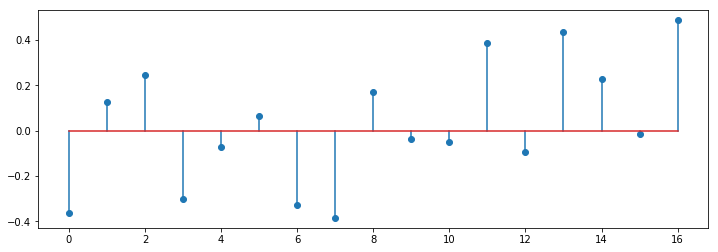

In [5]:
import random as rand
x = np.fromiter((2*rand.random()-1 for _ in range(30)),np.float32)

#plt.stem(x)
y1,y2,y3 = x[x>0.5],x[x<-0.5],x[np.logical_and(x>-0.5,x<0.5)]
plt.stem(y3)

## Exercise 3

Recall that the total energy in a signal $x(n)$ of length $N$ is:
$$ E = \sum_{n=0}^{N-1} x(n)^2 $$

- Load up a ~10 second audio sample into array `x`.
- Calculate the total energy for `x`
- Calculate the average energy for `x`.


In [6]:
x = load_wav('./audio/StingSevenDays.wav')

total = sum(x**2)
ave = sum(x**2)/len(x)
assert total == ave * len(x)

ipd.Audio(x, rate=22050)

## Exercise 4

Let's create an energy feature signal like we did in Lecture. With parameters:
- $x(n)$: the signal of length $N$
- $L$: window length
- $H$: hop size

The total number of frames in the energy signal is:
$$M = \lfloor {N - L \over H} \rfloor + 1$$

The (average) energy signal is therefore:
$$E(m) = \frac{1}{L} \sum_{n=mH}^{mH+L-1} x(n)^2 \text{ for } m \in [0, M-1]$$

The strategy for this algorithm is:
- calculate $M$
- create an empty energy array of length $M$
- in a `for` loop, calculate each value for $E(m)$ and assign it to the proper location in the energy array.
- return the array.

Plot the energy result. Try different values for $L$ and $H$ and find two that seem to work well.

[  8.54488462e-08   8.28877091e-08   1.01281330e-07 ...,   4.30613803e-03
   1.70356291e-03   1.18509657e-03]


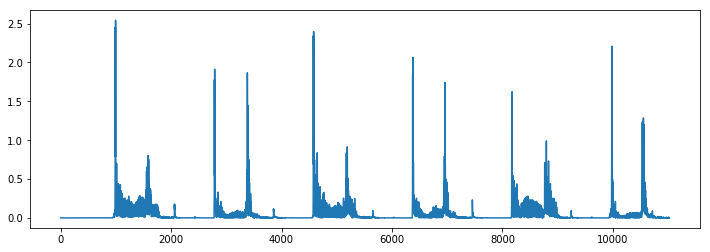

In [41]:
# calcuate the energy feature
def calc_energy_feature(x, win_len, hop_size):
    M = int(len(x)-win_len)/hop_size + 1
    gen = (sum(x[hop_size*m:hop_size*m+win_len]**2) for m in range(M))
    return np.fromiter(gen,np.float)
    
y = calc_energy_feature(x,50,20)
print y
plt.figure()
plt.plot(y)
ipd.Audio(x, rate=22050)

## Exercise 5

We now convert the energy signal into a _Energy Novetly Function_ (ENF):

$$\Delta(n) = \vert E(n+1) - E(n) \vert_{\ge 0}$$

In other words, take the discrete-time derivative of $E(n)$. Then, set all negative values to 0. This can be done easily by using boolean indexing as shown in the example below.

- Create the ENF based on the forumla above
- Plot it for the energy of $x(n)$

[99 99 99 99 99  5  6  7]


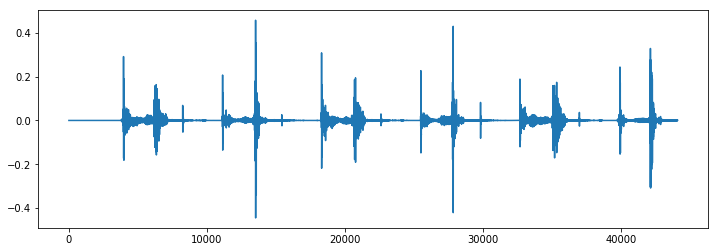

In [42]:
a = np.arange(8)
a[a < 5] = 99
print a

# calculate the energy novelty function from an energy feature signal
def calc_enf(x):
    y=x[1:]-x[:-1]
    return y

enf = calc_enf(calc_energy_feature(x,20,5))
plt.figure()
plt.plot(enf)
#calc_enf()


## Exercise 6

Hopefully, your ENF plot has a number of sharp peaks. To find the locations of these peaks, we use the peak detection function below.

- Use `find_peaks()` to locate the peaks of your ENF.
- Plot the peaks on top of the ENF. There are a few ways to visualize peaks. I like placing a red circle at the peak location. `plt.plot(xs, ys, 'ro')` will place a red 'o' at the locations specified by `xs` and `ys` (a point at `(xs[0], ys[0])`, `(xs[1], ys[1])`, etc...). 
- Run the code several times with different values for `thresh` so that you get "just the good peaks".


In [43]:
def find_peaks(x, thresh = 0.4) :
    x0 = x[:-2]   # x
    x1 = x[1:-1]  # x shifted by 1
    x2 = x[2:]    # x shifted by 2

    peak_bools = np.logical_and(x0 < x1, x1 > x2) # where x1 is higher than surroundings
    values = x1[peak_bools]                       # list of all peak values

    # find a threshold relative to the highest peak
    th = np.max(values) * thresh
    
    # filter out values that are below th
    peak_bools = np.logical_and(peak_bools, x1 > th)

    peaks = np.nonzero( peak_bools )[0] + 1       # get indexes of peaks, shift by 1
    return peaks


[ 3958  3981 11135 13524 13569 18304 20693 20763 25494 27839 32674 39919
 42126 42135 42205 42213 42256 42263]


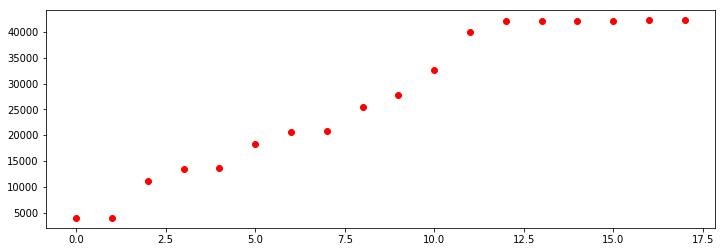

In [44]:
# call find_peaks and plot results...
peaks = find_peaks(enf)
print peaks
plt.plot(peaks,'ro')


## Exercise 7

Now that we have good peak locations for onsets, we will synthesize a click track corresponding to the peaks.

Create a function `sonify(locs, snd)` which will place copies of the waveform `snd` at each location specified by `locs`.
- Create an output array of zeros (`np.zeros`) of the appropriate length. 
- Loop through each sample in `locs` and copy `snd` into the proper location of the output array.
- Important: the `locs` array must be in units of the sample rate (22050). But the peaks you generated are sampled at a different rate.

You can listen to the resulting clicks (`ipd.Audio()`).  

Even better is listening to the original audio `x` and the click track at the same time. To do that, you can provide a list of two arrays to `ipd.Audio()`, and you will hear each array from a different speaker. Note that both arrays must be of the same length.


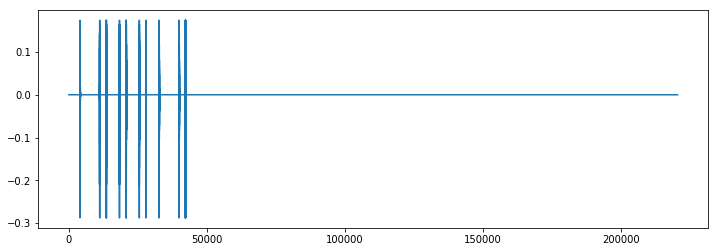

In [45]:
fs = 22050
cl_wav = load_wav('audio/click.wav')
click_locs = peaks
def sonify(locs, snd):
    z = np.zeros(len(x))
    for loc in locs:
        len_snd = len(snd)
        z[loc:loc+len_snd] = snd
    return z

y = sonify(click_locs, cl_wav)
plt.figure()
plt.plot(y)
ipd.Audio(y,rate=22050)